In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

**Define the equilibrium parametric vector**

In [7]:
pmin = np.array([0.0009721429046982305, 7.677635472687987e-05, 4.027512174464999, 9.993153827223693, 
 0.2013241581169894, 5.3418548562315396, 0.0004919783567445465, 4.445817328411718, 
 3.5485898584484867, 0.0009372137025961741, 0.0003417112284474173, 40.96254014108725, 
 0.4393515113945223, 1.9580523034135725e-05, 6.857951478821697e-05, 1.5265243421408876])

# Sobol sensitivity analysis

In [8]:
from SALib.sample import saltelli, latin
from SALib.analyze import sobol, delta, rbd_fast
from SALib.test_functions import Ishigami

**Construct model for utilize the data of random sampling**

1. pick 5%-neighborhood of the initial point
2. set the density of parametric sampling inside the hypercube

In [9]:
percentAround = 5
saltelliDeep = 100

*Define problem dictionary for SAlib analyzer*

In [10]:
_v = pd.DataFrame({'min': pmin*(1-percentAround/100.), 'max': pmin*(1+percentAround/100.)})
problem = {
    'num_vars': 16,
    'names': ['na', 'nx', 'm3', 'sa', 
              'sb', 'smt', 'nu', 'h', 
              'tb', 'ca', 'cx', 's0', 
              'psa-cth', 'efa', 'efx', 'eft'],
    'bounds': _v.to_numpy().tolist()
}

del(_v)
display(problem)

{'num_vars': 16,
 'names': ['na',
  'nx',
  'm3',
  'sa',
  'sb',
  'smt',
  'nu',
  'h',
  'tb',
  'ca',
  'cx',
  's0',
  'psa-cth',
  'efa',
  'efx',
  'eft'],
 'bounds': [[0.0009235357594633189, 0.001020750049933142],
  [7.293753699053587e-05, 8.061517246322386e-05],
  [3.8261365657417485, 4.228887783188249],
  [9.49349613586251, 10.492811518584878],
  [0.19125795021113992, 0.21139036602283887],
  [5.074762113419962, 5.608947599043117],
  [0.0004673794389073191, 0.0005165772745817738],
  [4.223526461991132, 4.668108194832304],
  [3.371160365526062, 3.7260193513709114],
  [0.0008903530174663654, 0.0009840743877259828],
  [0.0003246256670250464, 0.0003587967898697882],
  [38.91441313403289, 43.010667148141614],
  [0.41738393582479616, 0.4613190869642484],
  [1.8601496882428937e-05, 2.0559549185842514e-05],
  [6.515053904880612e-05, 7.200849052762783e-05],
  [1.4501981250338432, 1.602850559247932]]}

*Run Saltelli sampler to form dot cloud*

In [11]:
Xex = saltelli.sample(problem, saltelliDeep)
_2save = pd.DataFrame(Xex)
print( "Generate points: ", _2save.shape[0] )
_2save['16'] = np.nan
_2save.to_csv('saltelli-%d-%d.csv' % (percentAround, saltelliDeep), index=True, na_rep='nan')

Generate points:  3400


### CSV file next was processed by solvecloud on a multicore high-performance machine
1. Edit *solvecloud.py* and set proper filenames for input and output files
2. Set *L1M_NTHREADS* as for optimizer run
3. run *./solvecloud.py* in the *screen*

In [12]:
Yex = pd.read_csv('values_sobol-%d-%d.txt' % (percentAround, saltelliDeep), names=['id', 'err'])
Yex.index = Yex['id']
Yex = Yex.iloc[:, 1:]

**Analyze the sensitivity of the total square error to every parameter**

In [13]:
Si = sobol.analyze(problem, Yex['err'].to_numpy(), print_to_console=True)

Parameter S1 S1_conf ST ST_conf
na -0.000698 0.000854 0.000034 0.000050
nx -0.000964 0.003035 0.000206 0.000189
m3 0.003665 0.013364 0.005044 0.006985
sa 0.157759 0.236276 0.452277 0.304335
sb 0.182528 0.199262 0.711754 0.465926
smt 0.002820 0.002775 0.000178 0.000192
nu -0.000346 0.000588 0.000007 0.000008
h 0.000287 0.003698 0.000148 0.000101
tb 0.002510 0.010180 0.002551 0.003101
ca 0.000759 0.004799 0.001167 0.001839
cx 0.005134 0.008710 0.006483 0.009292
s0 0.000934 0.004419 0.000719 0.000672
psa-cth 0.041061 0.055154 0.484660 0.260200
efa 0.000036 0.000308 0.000004 0.000005
efx 0.000105 0.000329 0.000002 0.000002
eft 0.000843 0.001929 0.000075 0.000080

Parameter_1 Parameter_2 S2 S2_conf
na nx 0.001383 0.001554
na m3 0.001447 0.001645
na sa 0.003503 0.004341
na sb 0.001598 0.001837
na smt 0.001397 0.001573
na nu 0.001392 0.001579
na h 0.001415 0.001603
na tb 0.001428 0.001625
na ca 0.001399 0.001581
na cx 0.001477 0.001607
na s0 0.001359 0.001561
na psa-cth 0.000153 0.000915
na e

**Extract notochord area (delta) and somite mesoderm from the LOG of cloudsolve**
```
$> grep Smad saltelli-5-100.log | awk '{ print substr($0, 17); }' > 'somite-saltelli-5-100.csv'
$> grep Delta saltelli-5-100.log | awk '{ print substr($0, 17); }' > 'delta-saltelli-5-100.csv'
```

In [14]:
delta_data = pd.read_csv('delta-saltelli-5-100.csv', sep=' ', header=None)
somite_data = pd.read_csv('somite-saltelli-5-100.csv', sep=' ', header=None)

## Perform sensitivity analysis of parameter influence to both notochord and somite area under different conditions

*Make labels for parameters*

In [15]:
par_names = \
    "$n_\\alpha$ $n_x$ $[MMP3]$ $s_a$ $s_b$ $[pSMAD]_{thr}$ $\\nu$" + \
    " $h$ $t_b$ $c_\\alpha$ $c_x$ $\\delta_{init}$ $(s_a-[pSMAD]_{smt})$ $f_\\alpha$ $f_x$ $[ENAF]_{thr}$"
cnames = par_names.split(' ')
cond_names = \
    "WT$_1$ 1/2 WT-N2 1/2-N2 WT$_2$ WT-M3 WT-M3-N2 WT$_3$ WT-Ch WT-Ch-N2"
rnames = cond_names.split(' ')
del(par_names, cond_names)

*Run Sobol GSA for every condition*

In [16]:
s1_delta = pd.DataFrame(np.zeros((16,10)), index=cnames, columns=rnames)
for i in range(delta_data.shape[1]):
    Si = sobol.analyze(problem, delta_data.iloc[:,i].to_numpy(), conf_level=0.90, print_to_console=False)
    s1_delta.iloc[:,i] = Si['ST']

s1_somit = pd.DataFrame(np.zeros((16,10)), index=cnames, columns=rnames)
for i in range(delta_data.shape[1]):
    Si = sobol.analyze(problem, somite_data.iloc[:,i].to_numpy(), conf_level=0.90, print_to_console=False)
    s1_somit.iloc[:,i] = Si['ST']

*Reorder parameters*

In [17]:
s1_delta = s1_delta.iloc[[0,1,9,10,3,4,5,12,6,7,2,8,13,14,15,11],:]
s1_somit = s1_somit.iloc[[0,1,9,10,3,4,5,12,6,7,2,8,13,14,15,11],:]

**Draw heatmaps**

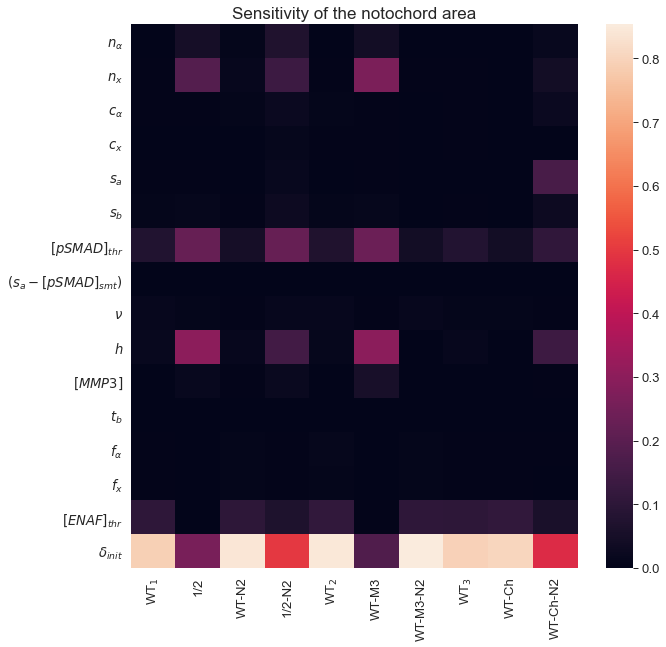

In [18]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.5)  

f = plt.figure(figsize=(10,10))
g = sns.heatmap(s1_delta, figure=f).set_title('Sensitivity of the notochord area', fontsize=17)
f.savefig('gsa-not.pdf')

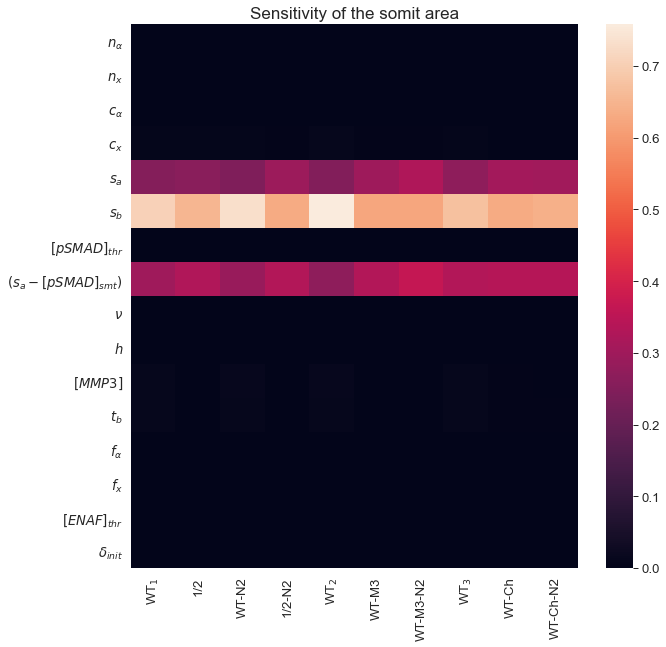

In [19]:
f = plt.figure(figsize=(10,10))
g = sns.heatmap(s1_somit, figure=f).set_title('Sensitivity of the somit area', fontsize=17)
f.savefig('gsa-som.pdf')